In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import pandas as pd
import tensorflow as tf    # tensorflow ver. 2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [0]:
path = './gdrive/My Drive/2020_AI_Class/03.Deep Learning/traffic_data/'
# set LABEL first
output_cols = ['vel']
# set traffic column
input_cols = ['vel_t05', 'vel_t10', 'vel_t15', 'vel_t20', 'vel_t25', 'vel_t30', 'vel_t35', 'vel_t40']

In [29]:
# Model, Cost, Tain
model = Sequential()
model.add(Dense(30, input_shape=(len(input_cols),), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation=None))

model.compile(loss='mse',optimizer=Adam(0.001), metrics=['mape'])  # Mean Asolute Percentage Error
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 3,091
Trainable params: 3,091
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Train Data
train_data = pd.read_csv(path + 'traffic_data_train.csv', index_col=0)
X_train = train_data[input_cols].values
Y_train = train_data[output_cols].values

In [33]:
train_data.head()

,vel,date,time,vel_t05,vel_t10,vel_t15,vel_t20,vel_t25,vel_t30,vel_t35,vel_t40
0,87.97,20150911,145,92.61,87.62,97.10,96.15001,89.60,94.73,92.55,93.91
1,94.30,20150118,1725,90.42,90.75,98.72,97.54000,96.54,95.66,97.19,95.52
2,82.44,20151015,420,80.88,86.17,80.72,89.56000,74.97,79.61,83.27,81.66
3,90.22,20150606,445,91.26,90.98,95.49,89.78000,91.46,85.99,85.85,89.34
4,97.69,20150720,1250,93.60,94.37,92.67,91.72000,95.67,92.86,92.03,92.46


In [32]:
X_train[:5]

array([[92.61   , 87.62   , 97.1    , 96.15001, 89.6    , 94.73   ,
        92.55   , 93.91   ],
       [90.42   , 90.75   , 98.72   , 97.54   , 96.54   , 95.66   ,
        97.19   , 95.52   ],
       [80.88   , 86.17   , 80.72   , 89.56   , 74.97   , 79.61   ,
        83.27   , 81.66   ],
       [91.26   , 90.98   , 95.49   , 89.78   , 91.46   , 85.99   ,
        85.85   , 89.34   ],
       [93.6    , 94.37   , 92.67   , 91.72   , 95.67   , 92.86   ,
        92.03   , 92.46   ]])

In [35]:
# Training
model.fit(X_train, Y_train, epochs=10, batch_size=1024, verbose=1)

Epoch 1/10
101/101 [==============================] - 0s 2ms/step - loss: 13.1115 - mape: 2.8888
Epoch 2/10
101/101 [==============================] - 0s 3ms/step - loss: 13.1161 - mape: 2.8791
Epoch 3/10
101/101 [==============================] - 0s 3ms/step - loss: 13.0117 - mape: 2.8691
Epoch 4/10
101/101 [==============================] - 0s 3ms/step - loss: 13.0207 - mape: 2.8768
Epoch 5/10
101/101 [==============================] - 0s 3ms/step - loss: 13.0490 - mape: 2.8726
Epoch 6/10
101/101 [==============================] - 0s 3ms/step - loss: 13.0839 - mape: 2.8830
Epoch 7/10
101/101 [==============================] - 0s 3ms/step - loss: 13.2092 - mape: 2.8825
Epoch 8/10
101/101 [==============================] - 0s 3ms/step - loss: 13.1148 - mape: 2.8850
Epoch 9/10
101/101 [==============================] - 0s 3ms/step - loss: 13.0270 - mape: 2.8732
Epoch 10/10
101/101 [==============================] - 0s 3ms/step - loss: 13.0003 - mape: 2.8648


In [0]:
# Test Data #1
test1_data = pd.read_csv(path + 'traffic_data_test1.csv', index_col=0)
X_test1 = test1_data[input_cols].values
Y_test1 = test1_data[output_cols].values

In [38]:
model.evaluate(X_test1, Y_test1)

32/32 [==============================] - 0s 1ms/step - loss: 11.8879 - mape: 2.9439


[11.887921333312988, 2.943859100341797]

In [47]:
# Test Data #2
test2_data = pd.read_csv(path + 'traffic_data_test2.csv', index_col=0)
test2_data.head()

,date,time,vel,vel_t05,vel_t10,vel_t15,vel_t20,vel_t25,vel_t30,vel_t35,vel_t40
0,20160209,0,94.70,97.11001,96.10000,93.97000,95.69000,94.04000,95.10,88.22,92.24
1,20160209,5,95.52,94.70000,97.11001,96.10000,93.97000,95.69000,94.04,95.10,88.22
2,20160209,10,100.31,95.52000,94.70000,97.11001,96.10000,93.97000,95.69,94.04,95.10
3,20160209,15,91.80,100.31000,95.52000,94.70000,97.11001,96.10000,93.97,95.69,94.04
4,20160209,20,96.30,91.80000,100.31000,95.52000,94.70000,97.11001,96.10,93.97,95.69


In [0]:
test2_data['date'] = pd.to_datetime(test2_data['date'], format='%Y%m%d')
test2_data['time'] = test2_data['time'].map(lambda x: pd.Timedelta(hours=x // 100, minutes=x % 100))

In [0]:
test2_data['datetime'] = test2_data['date'] + test2_data['time']
X_test2 = test2_data[input_cols].values
Y_test2 = test2_data[output_cols].values

In [50]:
model.evaluate(X_test2, Y_test2)

9/9 [==============================] - 0s 1ms/step - loss: 45.7116 - mape: 8.0925


[45.71160125732422, 8.092472076416016]

In [51]:
prediction = model.predict(X_test2)
prediction

array([[ 95.5076  ],
       [ 95.25075 ],
       [ 95.428314],
       [ 97.048935],
       [ 95.28815 ],
       [ 95.63845 ],
       [ 95.723335],
       [ 95.05814 ],
       [ 95.906845],
       [ 95.438545],
       [ 97.376015],
       [ 97.32031 ],
       [ 97.25417 ],
       [ 97.71644 ],
       [ 97.2251  ],
       [ 98.64842 ],
       [ 98.38863 ],
       [100.9674  ],
       [ 95.77587 ],
       [ 96.0406  ],
       [ 95.29359 ],
       [ 93.97499 ],
       [ 95.63328 ],
       [ 94.31513 ],
       [ 97.7186  ],
       [101.33411 ],
       [107.77384 ],
       [100.252426],
       [100.68871 ],
       [101.37841 ],
       [101.126045],
       [ 97.02737 ],
       [ 97.902985],
       [ 99.56396 ],
       [ 97.63593 ],
       [ 96.90899 ],
       [ 99.36184 ],
       [ 96.17224 ],
       [ 96.70999 ],
       [ 98.597664],
       [ 98.89486 ],
       [ 98.76376 ],
       [ 99.38941 ],
       [100.35007 ],
       [ 99.70216 ],
       [ 94.791245],
       [101.563484],
       [103.7

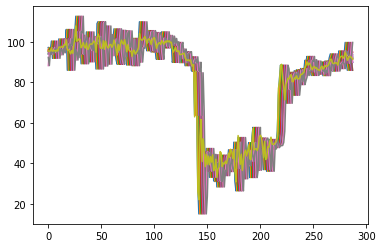

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()

plt.plot(X_test2)
plt.plot(prediction)

# ax.lengend(['Prediction', 'Real'])
plt.show()